In [2]:
import pandas as pd
%matplotlib inline 
# tells pandas and matplotlib to show plot immediately under clel 

### Importing the data
Let's import the coffee data from CSV 

In [20]:
# Read data from data/coffees.csv
data = pd.read_csv('data/coffees.csv')
data.head()


,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


### Clean Data
* Remove NaNs, string of text in coffees column, encode contributor 

In [7]:
data.loc[2] # location based index, item with index named '2'

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

In [8]:
data.iloc[2] # look at index 2

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

In [19]:
# Access coffees column (a series)
data.coffees[:5] # first 5 elements 

# can also access series using string 
# data['coffees'][:5]

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
type(data.coffees)

pandas.core.series.Series

* Series vs. DataFrames: Difference between series vs df is dataframe contains different columns, all of which can be viewed as series 

In [10]:
# how long is dataset 
print (len(data))

671


In [11]:
# .describe() gives dataframe of information about 
    # length of each column 
    # number of unique values
    # top = most common values
    # frequency = frequency of top 
data.describe() 


,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-06-08 11:55:00,13523.0,Quentin
freq,1,2,367


In [23]:
# Look at dataframe where coffees is null 

# .isnull() and boolean indexing with []
data.coffees.isnull()


0      False
1      False
2      False
3       True
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
641     True
642     True
643    False
644    False
645    False
646    False
647    False
648    False
649    False
650    False
651    False
652    False
653     True
654    False
655    False
656    False
657    False
658    False
659    False
660    False
661    False
662    False
663    False
664    False
665    False
666    False
667    False
668    False
669    False
670    False
Name: coffees, Length: 671, dtype: bool

In [27]:
# all data with null values 
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


#### Look at Datatype of Python objects 

In [29]:
# What is data type of Python objects of columns? 
data.dtypes 

timestamp      object
coffees        object
contributor    object
dtype: object

In [31]:
type(data) # Dataframe 

pandas.core.frame.DataFrame

In [36]:
type(data.dtypes) # Series 

pandas.core.series.Series

In [32]:
type(data.coffees)

pandas.core.series.Series

In [33]:
data.coffees.dtypes

dtype('O')

`type()` vs `.dtypes`
* `type()` is applied to objects (will tell if dataframe or series) 
* `.dtypes` gives back a series where indices are names of column, and values are type that object is 

In [39]:
# let's inspect timestamp column 
print (data.timestamp[0]) # access 1st element 
print (type(data.timestamp[0]))
    # this is a string because it is a csv file, read in as strings 

2011-10-03 08:22:00
<class 'str'>


* On our first pass, problems that we found: 
    * `timestamp` column contains strings, these need to be datetimes 
    * `coffees` column contains null values 
    * `coffees` also contains at least one string 

#### Convert series to numeric datatype 

In [44]:
# Convert coffees to only numerical data 
data.coffees = pd.to_numeric(data.coffees, errors = 'coerce') 
    # .to_numeric() casts data to numerical format
    # anytime you find something that can't be cast to numerical,
    # get rid of it and turn it into an NaN
    
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [43]:
data.dtypes
# now coffees column are numerical objects 

timestamp       object
coffees        float64
contributor     object
dtype: object

#### Drop NaNs

In [48]:
# .dropna() returns dataframe without NaN values
    # inplace = TRUE to do it on original data 
    
data.dropna(inplace = True) 
data.head() # lose NaNs, and also the associated index

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony


In [50]:
data.dtypes # it's a float64
# Cast to int using .astype() 

timestamp       object
coffees        float64
contributor     object
dtype: object

In [55]:
# Cast to int using .astype() 
data.coffees = data.coffees.astype(int)
data.dtypes # now coffees is 64bit integers instead of floats 

timestamp      object
coffees         int32
contributor    object
dtype: object

* to turn into integers, must `.to_numeric()`, then `.astype(int)` to turn into integers
* if had used `.astype(int)` on first pass, would have failed on string 

In [59]:
# parse the `timestamp` strings to datetime objects 
data.timestamp = pd.to_datetime(data.timestamp)
data.dtypes # now timestamp is datetime 64 objects 

timestamp      datetime64[ns]
coffees                 int32
contributor            object
dtype: object

In [61]:
data.index 
# can access data index, actual piece of data contained in dataframe 

Int64Index([  0,   1,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            661, 662, 663, 664, 665, 666, 667, 668, 669, 670],
           dtype='int64', length=657)

In [64]:
data.describe() # now only describes numeric values
 # when pandas encounters different datatypes, defaults to numeric values 

,coffees
count,657.000000
mean,8568.471842
std,4600.215049
min,397.000000
25%,4986.000000
50%,9172.000000
75%,11562.000000
max,24463.000000


In [66]:
data.describe(include = 'all')

,timestamp,coffees,contributor
count,657,657.000000,657
unique,657,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,361
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


### Visualize Data 

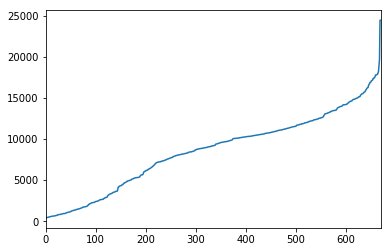

In [67]:
# plot on the series method 
data.coffees.plot()

* pandas is plotting the coffees agains the index, which is just a series of integers, should be plotting against datetime 

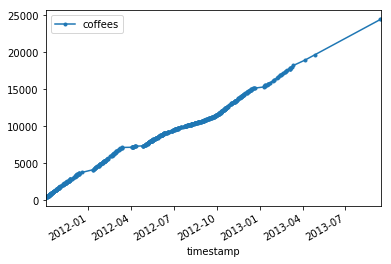

In [70]:
# plot on the dataframe method rather than the series 
data.plot(x = data.timestamp, style = '.-')
    # style is . for datapoint, and - to connect datapoints

* last few datapoints has poor resolution (big gap), will remove 

In [72]:
data.tail(n = 10)

,timestamp,coffees,contributor
661,2013-03-04 11:12:00,17793,Quentin
662,2013-03-04 16:43:00,17824,Quentin
663,2013-03-05 10:42:00,17852,Quentin
664,2013-03-05 13:29:00,17868,Quentin
665,2013-03-08 10:28:00,18062,Quentin
666,2013-03-12 08:28:00,18235,Sergio
667,2013-04-05 11:20:00,18942,Sergio
668,2013-04-27 11:04:00,19698,Sergio
669,2013-09-12 15:38:00,24450,Quentin
670,2013-09-13 10:28:00,24463,Quentin


In [78]:
# use conditional indexing to cut off data after 2013-03-01
data = data[data.timestamp < "2013-03-01"] # only dates less than 3/1

In [79]:
data.tail(n = 10)

,timestamp,coffees,contributor
649,2013-02-12 08:36:00,16891,Sergio
650,2013-02-12 11:39:00,16909,Quentin
651,2013-02-13 13:58:00,16977,Quentin
652,2013-02-16 11:55:00,17104,Quentin
654,2013-02-18 13:46:00,17165,Quentin
655,2013-02-21 13:44:00,17345,Quentin
656,2013-02-21 15:02:00,17354,Quentin
657,2013-02-25 13:33:00,17468,Quentin
658,2013-02-25 17:25:00,17489,Quentin
659,2013-02-27 09:33:00,17564,Quentin


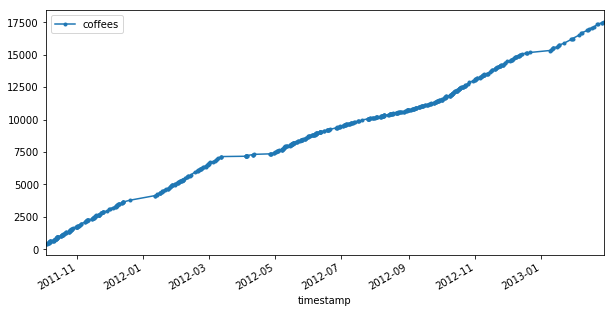

In [81]:
data.plot(x = data.timestamp, style = '.-', figsize = (10,5))

In [83]:
# Who contributed to dataset? 
data.contributor.value_counts()

# series has a method called `.value_counts()` which returns a series 
# indexed by unique values in the series (names) and returns the count
# for number of times that unique value occurs 


Quentin    354
Mike       152
Sergio      89
Mike M      29
Colm        12
Anthony      4
Ben          3
Stefano      2
Arturo       1
Name: contributor, dtype: int64

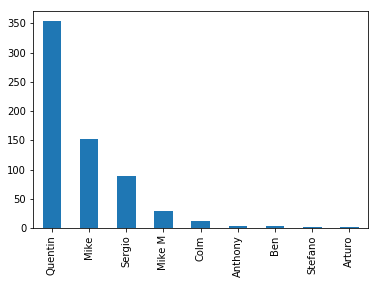

In [84]:
data.contributor.value_counts().plot(kind = 'bar')

* didn't need to specify an x value because for plotting series, the default 'x' is the index (in this case, the names) 

### Format Data 

In [87]:
# Create a series of the weekdays for each entry using .dt.weekday
weekdays = data.timestamp.dt.weekday 
weekdays # 0 = Monday, 6 = Sunday 

0      0
1      1
4      2
5      2
6      3
7      3
8      3
9      3
10     3
11     4
12     4
13     4
14     4
16     4
17     4
18     6
19     0
20     0
21     0
22     0
23     0
24     1
25     2
26     2
27     2
28     2
29     2
30     2
31     3
32     3
      ..
627    1
628    1
629    4
630    1
631    2
632    3
633    4
634    4
635    4
636    1
637    2
638    2
639    3
640    0
643    0
644    1
645    1
646    0
647    2
648    3
649    1
650    1
651    2
652    5
654    0
655    3
656    3
657    0
658    0
659    2
Name: timestamp, Length: 646, dtype: int64

 * because it is a timestamp column, has acceess to `.dt` attribute
 * `.dt` = datetime, `.dt` opens up new objects such as `weekday`

In [89]:
# assign() new weekdays column to our dataframe 
data = data.assign(weekdays = weekdays)
data.head() # new column containing day of week 

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,0
1,2011-10-04 11:48:00,410,Quentin,1
4,2011-10-05 10:47:00,464,Quentin,2
5,2011-10-05 13:15:00,481,Quentin,2
6,2011-10-06 07:21:00,503,Anthony,3


In [95]:
# replace integers with weekdays 
# dictionary that maps 0-6 to `weekday_names` string 
weekday_names = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key: weekday_names[key] for key in range(7)}

weekday_dict

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [109]:
# function to spit out day of week based on index 
def day_of_week(idx): 
    return weekday_dict[idx]

print(day_of_week(2))

doweek = lambda x: weekday_dict[x] # same thing as fxn above
print(doweek(2))



Wednesday
Wednesday


In [111]:
# use .apply() to apply a custom function to the weekdays column 
data.weekdays = data.weekdays.apply(day_of_week) 
data.weekdays
    # pass weekdays values to day_of_week fxn, and replace with day of 
    # week in dictionary

0         Monday
1        Tuesday
4      Wednesday
5      Wednesday
6       Thursday
7       Thursday
8       Thursday
9       Thursday
10      Thursday
11        Friday
12        Friday
13        Friday
14        Friday
16        Friday
17        Friday
18        Sunday
19        Monday
20        Monday
21        Monday
22        Monday
23        Monday
24       Tuesday
25     Wednesday
26     Wednesday
27     Wednesday
28     Wednesday
29     Wednesday
30     Wednesday
31      Thursday
32      Thursday
         ...    
627      Tuesday
628      Tuesday
629       Friday
630      Tuesday
631    Wednesday
632     Thursday
633       Friday
634       Friday
635       Friday
636      Tuesday
637    Wednesday
638    Wednesday
639     Thursday
640       Monday
643       Monday
644      Tuesday
645      Tuesday
646       Monday
647    Wednesday
648     Thursday
649      Tuesday
650      Tuesday
651    Wednesday
652     Saturday
654       Monday
655     Thursday
656     Thursday
657       Mond

In [112]:
data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,Monday
1,2011-10-04 11:48:00,410,Quentin,Tuesday
4,2011-10-05 10:47:00,464,Quentin,Wednesday
5,2011-10-05 13:15:00,481,Quentin,Wednesday
6,2011-10-06 07:21:00,503,Anthony,Thursday


In [116]:
# .groupby() - Group by weekdays 
weekday_counts = data.groupby('weekdays')
weekday_counts # gives nothing because they've only been grouped

In [127]:
# gather counts for those weekday groups
weekday_counts = data.groupby('weekdays').count()

weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Friday,114,114,114
Monday,145,145,145
Saturday,29,29,29
Sunday,13,13,13
Thursday,117,117,117
Tuesday,97,97,97
Wednesday,131,131,131


In [128]:
# reorder dataframe by our weekday_names list 
weekday_counts = weekday_counts.loc[weekday_names]
    # .loc tells dataframe to look for index names 
    
weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Monday,145,145,145
Tuesday,97,97,97
Wednesday,131,131,131
Thursday,117,117,117
Friday,114,114,114
Saturday,29,29,29
Sunday,13,13,13


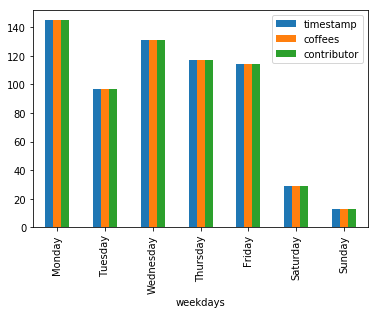

In [129]:
# Visualize weekday_counts
weekday_counts.plot(kind = 'bar')

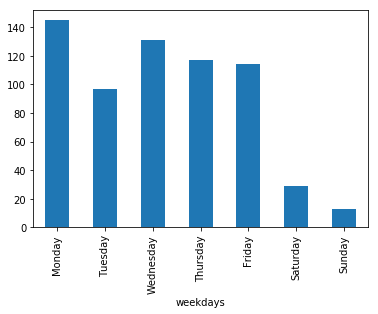

In [130]:
weekday_counts.coffees.plot(kind = 'bar') 
    # all three columns have same value, so just take coffee 

In [132]:
# Change the dataframe's index property to timestamp
data.index = data.timestamp
data.index 

DatetimeIndex(['2011-10-03 08:22:00', '2011-10-04 11:48:00',
               '2011-10-05 10:47:00', '2011-10-05 13:15:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               '2011-10-06 12:14:00', '2011-10-06 12:49:00',
               '2011-10-06 14:52:00', '2011-10-07 07:34:00',
               ...
               '2013-02-12 08:36:00', '2013-02-12 11:39:00',
               '2013-02-13 13:58:00', '2013-02-16 11:55:00',
               '2013-02-18 13:46:00', '2013-02-21 13:44:00',
               '2013-02-21 15:02:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', name='timestamp', length=646, freq=None)

In [133]:
# Drop timestamp column b/c we no longer need it
# .drop() takes a list of objects to drop, and will look in indices (rows)
    # if pass in axis = 1, will drop columns 
data.drop(['timestamp'], axis = 1, inplace = True)
data.head()

,coffees,contributor,weekdays
timestamp,,,
2011-10-03 08:22:00,397,Quentin,Monday
2011-10-04 11:48:00,410,Quentin,Tuesday
2011-10-05 10:47:00,464,Quentin,Wednesday
2011-10-05 13:15:00,481,Quentin,Wednesday
2011-10-06 07:21:00,503,Anthony,Thursday


In [141]:
data.loc['2011-10-03 08:22:00']

coffees            397
contributor    Quentin
weekdays        Monday
Name: 2011-10-03 08:22:00, dtype: object

### Intepolating Data 

In [148]:
# start some rows at midnight on everyday 

# pd.date_range(), with daily frequency, and normalization 
midnights = pd.date_range(data.index[0], data.index[-1], 
                          freq = "D", normalize = True) 
    # make date range with start at index 0 and end at (-1) last index 
    # frequency of days, normalize means make data pts at midnight 
    
midnights # gives daily datapoints at midnight, 
# if normalize = False, would give a different time
# if freq = "W", would give weekly dates 

DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
               '2013-02-26', '2013-02-27'],
              dtype='datetime64[ns]', length=514, freq='D')

* gives 514 days 


In [152]:
# Take the union of this index and our dataset's index 
new_index = midnights.union(data.index)

new_index # come up with new index that has values of both of indices 
# together in one index and make sure it is sorted in order  


DatetimeIndex(['2011-10-03 00:00:00', '2011-10-03 08:22:00',
               '2011-10-04 00:00:00', '2011-10-04 11:48:00',
               '2011-10-05 00:00:00', '2011-10-05 10:47:00',
               '2011-10-05 13:15:00', '2011-10-06 00:00:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               ...
               '2013-02-21 15:02:00', '2013-02-22 00:00:00',
               '2013-02-23 00:00:00', '2013-02-24 00:00:00',
               '2013-02-25 00:00:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-26 00:00:00',
               '2013-02-27 00:00:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', length=1160, freq=None)

In [155]:
# .reindex() the dataframe 
upsampled_data = data.reindex(new_index)

upsampled_data.head(10)
     # NaNs represent all the places we don't know 
     

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,NaN,NaN,NaN
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,NaN,NaN,NaN
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,NaN,NaN,NaN
2011-10-06 07:21:00,503.0,Anthony,Thursday
2011-10-06 10:04:00,513.0,Quentin,Thursday


In [154]:
# can fill nulls with a number > data.fillna(123).head()

upsampled_data.fillna(123).head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,123.0,123,123
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,123.0,123,123
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,123.0,123,123
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,123.0,123,123
2011-10-06 07:21:00,503.0,Anthony,Thursday
2011-10-06 10:04:00,513.0,Quentin,Thursday


* Intepolation is filling points between datapoints 